# B1 Data loading and inspection

In [1]:
pip install medmnist

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tqdm import tqdm
import numpy as np
import random
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from PIL import Image

import medmnist
from medmnist import INFO, Evaluator

In [2]:
print(medmnist.__version__)

2.0.2


In [3]:
data_flag = 'breastmnist'
download = True
info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_samples = info['n_samples']
n_classes = len(info['label'])
DataClass = getattr(medmnist, info['python_class'])

In [4]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
random.seed(62900)

Using downloaded and verified file: /Users/benjaminxie/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/benjaminxie/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/benjaminxie/.medmnist/breastmnist.npz


10 images for negative class of training set:


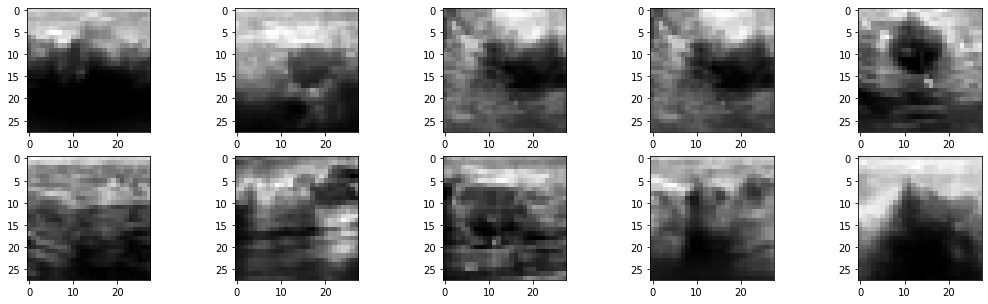

10 images for positive class of training set:


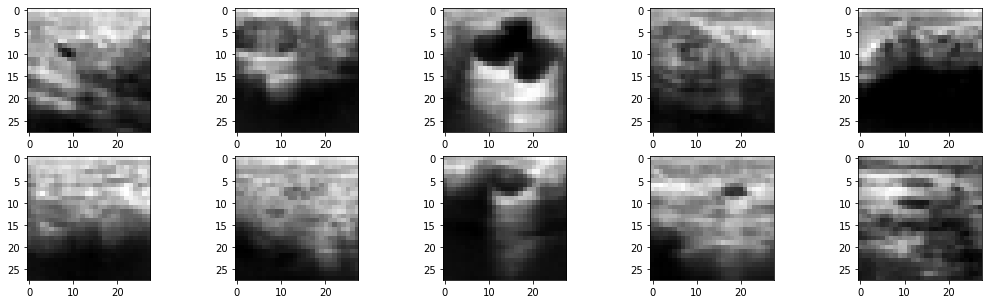

In [5]:
train_neg = []
train_pos = []
train_neg_num = 0
train_pos_num = 0
for i in range(n_samples['train']):
    if int(train_dataset[i][1]) == 0:
        train_neg.append(train_dataset[i][0].numpy())
        train_neg_num += 1
    else:
        train_pos.append(train_dataset[i][0].numpy())
        train_pos_num += 1
        
train_neg = np.array(train_neg)
train_pos = np.array(train_pos)

print("10 images for negative class of training set:")

plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, train_neg_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(train_neg[n].squeeze(),cmap=plt.cm.gray)
plt.show()
    
print('=====================================================================================================================')
print('10 images for positive class of training set:')
plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, train_pos_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(train_pos[n].squeeze(),cmap=plt.cm.gray)
plt.show()

10 images for negative class of test set:


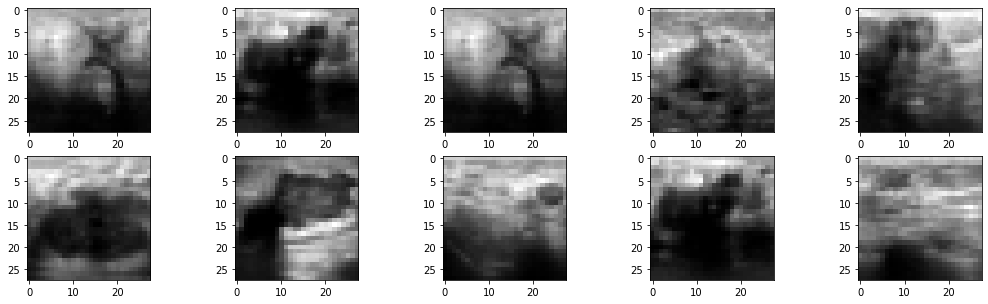

10 images for positive class of test set:


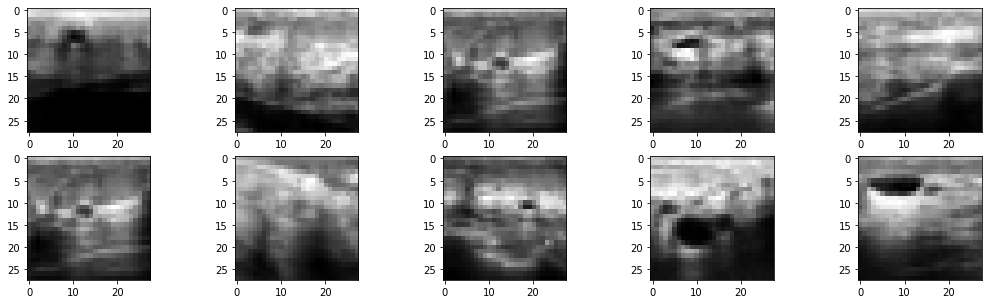

In [6]:
test_neg = []
test_pos = []
test_neg_num = 0
test_pos_num = 0
for i in range(n_samples['test']):
    if int(test_dataset[i][1]) == 0:
        test_neg.append(test_dataset[i][0].numpy())
        test_neg_num += 1
    else:
        test_pos.append(test_dataset[i][0].numpy())
        test_pos_num += 1
        
test_neg = np.array(test_neg)
test_pos = np.array(test_pos)

print("10 images for negative class of test set:")

plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, test_neg_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(test_neg[n].squeeze(),cmap=plt.cm.gray)
plt.show()
    
print('=====================================================================================================================')
print('10 images for positive class of test set:')

plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, test_pos_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(test_pos[n].squeeze(),cmap=plt.cm.gray)
plt.show()

10 images for negative class of validation set:


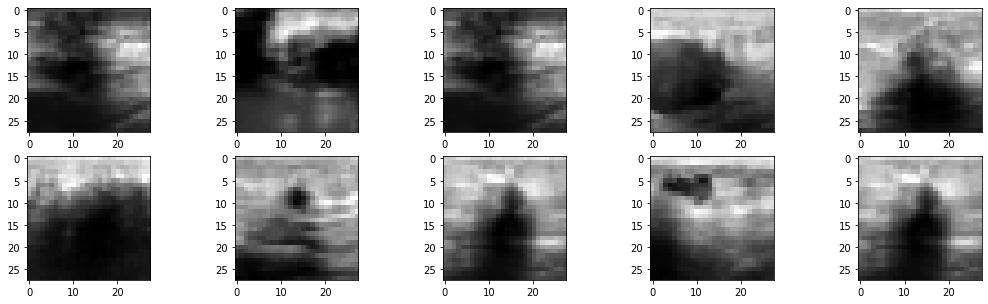

10 images for positive class of validation set:


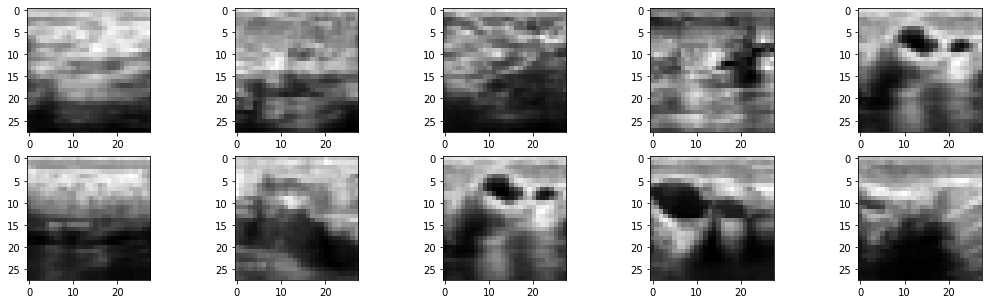

In [7]:
val_neg = []
val_pos = []
val_neg_num = 0
val_pos_num = 0
for i in range(n_samples['val']):
    if int(val_dataset[i][1]) == 0:
        val_neg.append(val_dataset[i][0].numpy())
        val_neg_num += 1
    else:
        val_pos.append(val_dataset[i][0].numpy())
        val_pos_num += 1
        
val_neg = np.array(val_neg)
val_pos = np.array(val_pos)

print("10 images for negative class of validation set:")

plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, val_neg_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(val_neg[n].squeeze(),cmap=plt.cm.gray)
plt.show()
    
print('=====================================================================================================================')
print('10 images for positive class of validation set:')
    
plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, val_pos_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(val_pos[n].squeeze(),cmap=plt.cm.gray)
plt.show()

# B2 Logistic regression
## (a) Using the built-in logistic regression functions in scikit-learn, train a logistic regression model with L2 regularisation on the training set, use the validation set to choose a good regularisation parameter (a hyperparameter) from at least three choices, and test the chosen model on the test set. Report the three metrics M1 to M3.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

XTrain = []
yTrain = []
XVal = []
yVal = []
XTest = []
yTest = []
for i in range(n_samples['train']):
    XTrain.append(train_dataset[i][0][0].tolist())
    yTrain.append(train_dataset[i][1][0])

for i in range(n_samples['val']):
    XVal.append(val_dataset[i][0][0].tolist())
    yVal.append(val_dataset[i][1][0])

for i in range(n_samples['test']):
    XTest.append(test_dataset[i][0][0].tolist())
    yTest.append(test_dataset[i][1][0])

XTrain = np.array(XTrain)
nsamples_train, nx_train, ny_train = np.shape(XTrain)
XTrain = XTrain.reshape((nsamples_train,nx_train*ny_train))
XTest = np.array(XTest)
nsamples_test, nx_test, ny_test = np.shape(XTest)
XTest = XTest.reshape((nsamples_test,nx_test*ny_test))
XVal = np.array(XVal)
nsamples_val, nx_val, ny_val = np.shape(XVal)
XVal = XVal.reshape((nsamples_val,nx_val*ny_val))

clf = LogisticRegression(max_iter=1000).fit(XTrain, yTrain)
C_opts = np.linspace(0.5, 0.6, 5)
param_grid = dict(C = C_opts)
grid_regression = GridSearchCV(LogisticRegression(), param_grid=param_grid)
grid_regression.fit(XVal, yVal)
grid_regression.best_params_

{'C': 0.55}

In [14]:
clf = LogisticRegression(C = grid_regression.best_params_["C"], max_iter=1000)
clf.fit(XTrain, yTrain)
yTrain_pred = clf.predict(XTrain)
yVal_pred = clf.predict(XVal)
yTest_pred = clf.predict(XTest)
train_correct_num0 = 0
val_correct_num0 = 0
test_correct_num0 = 0
for i in range(len(yTrain)):
    if yTrain_pred[i] == yTrain[i]:
        train_correct_num0 += 1
for i in range(len(yVal)):
    if yVal_pred[i] == yVal[i]:
        val_correct_num0 += 1
for i in range(len(yTest)):
    if yTest_pred[i] == yTest[i]:
        test_correct_num0 += 1
accuracy_train_B0 = train_correct_num0/n_samples['train']
accuracy_val_B0 = val_correct_num0/n_samples['val']
accuracy_test_B0 = test_correct_num0/n_samples['test']
print("M1) Training Accuracy: %2.3f %%" % (100 * accuracy_train_B0))
print("M2) Validation Accuracy: %2.3f %%" % (100 * accuracy_val_B0))
print("M3) Testing Accuracy: %2.3f %%" % (100 * accuracy_test_B0))

M1) Training Accuracy: 91.758 %
M2) Validation Accuracy: 84.615 %
M3) Testing Accuracy: 79.487 %


## (b) Using PyTorch (see Question 5 of Lab 6), train a logistic regression model with L2 regularisation on the training set, use the validation set to choose a good regularisation parameter (a hyperparameter) from at least three choices, and test the chosen model on the test set. Report the three metrics M1 to M3.


In [16]:
import torch.nn as nn
import torch.nn.functional as F
from itertools import count

class LogisticRegression(nn.Module):
    
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(784, 1)     
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
def get_batch_logi_regress(sgx,sgy,batch_size=32):

    #create a vector with the indexes: from 0 to the size of the input data
    indexes= torch.linspace(0,sgx.shape[0]-1,steps=sgx.shape[0])
    
    #sample random indicies from the vector above, these 32 
    #random numbers are the row indexes for the batch data.
    
    random_indexes=torch.multinomial(indexes,32)
    
    batch_x= sgx[random_indexes]
    batch_y= sgy[random_indexes]
    
    return batch_x, batch_y

LR = LogisticRegression()
# train_correct_num = 0
criterion = nn.BCELoss()

for batch_idx in count(1):
    # Get data
    batch_x, batch_y = get_batch_logi_regress(np.array(XTrain), np.array(yTrain))
    # Reset gradients
    LR.zero_grad()
    
    # Forward pass
    # however we need to change the above ndarray to torch
    # tensors before calling the function LR.forward
    
    #warping ndarray to torch tensors
    batch_x=(torch.from_numpy(batch_x.astype(np.float32)))
    batch_y=(torch.from_numpy(batch_y.astype(np.float32)))
    
    output = criterion(torch.squeeze(LR(batch_x)), batch_y)
    loss = output.item()
    
    # Backward pass
    output.backward()

    # Apply gradients
    for param in LR.parameters():
        param.data.add_(-0.5 * param.grad.data)
        
    # Stop criterion
    if abs(loss) < 1e-2:
        break

In [31]:
pip install -U ray

     |████████████████████████████████| 55.7 MB 657 kB/s eta 0:00:013     |████████████████                | 27.8 MB 672 kB/s eta 0:00:42
     |████████████████████████████████| 1.0 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 6.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install 'ray[tune]'

     |████████████████████████████████| 124 kB 5.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
from ray import tune

def training_function(config):
    weight_decay = config["weight_decay"]
    for step in range(10):
        intermediate_score = objective(step, "weight_decay")
        tune.report(mean_loss=intermediate_score)

analysis = tune.run(training_function, config={"weight_decay": tune.grid_search([0.01, 0.1, 0.5])})

Trial name,status,loc,weight_decay
training_function_5f312_00000,PENDING,,0.01
training_function_5f312_00001,PENDING,,0.1
training_function_5f312_00002,PENDING,,0.5


(pid=61413) 2021-12-02 01:01:25,509	ERROR function_runner.py:268 -- Runner Thread raised error.
(pid=61413) Traceback (most recent call last):
(pid=61413)   File "/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 262, in run
(pid=61413)     self._entrypoint()
(pid=61413)   File "/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 330, in entrypoint
(pid=61413)     return self._trainable_func(self.config, self._status_reporter,
(pid=61413)   File "/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/ray/util/tracing/tracing_helper.py", line 451, in _resume_span
(pid=61413)     return method(self, *_args, **_kwargs)
(pid=61413)   File "/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 599, in _trainable_func
(pid=61413)     output = fn()
(pid=61413)   File "<ipython-input-37-a542d6e52bda>", line 6, in training_function
(pid=61413) NameError: name

Result for training_function_5f312_00000:
  date: 2021-12-02_01-01-25
  experiment_id: b19ec03633474d1cb162f6ca282ac045
  hostname: pc-9-70.customer.ask4.lan
  node_ip: 127.0.0.1
  pid: 61412
  timestamp: 1638406885
  trial_id: 5f312_00000
  
Result for training_function_5f312_00001:
  date: 2021-12-02_01-01-25
  experiment_id: ee57be91673644c2adf5a43febca93db
  hostname: pc-9-70.customer.ask4.lan
  node_ip: 127.0.0.1
  pid: 61413
  timestamp: 1638406885
  trial_id: 5f312_00001
  


(pid=61949) 2021-12-02 01:01:26,963	ERROR function_runner.py:268 -- Runner Thread raised error.
(pid=61949) Traceback (most recent call last):
(pid=61949)   File "/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 262, in run
(pid=61949)     self._entrypoint()
(pid=61949)   File "/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 330, in entrypoint
(pid=61949)     return self._trainable_func(self.config, self._status_reporter,
(pid=61949)   File "/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/ray/util/tracing/tracing_helper.py", line 451, in _resume_span
(pid=61949)     return method(self, *_args, **_kwargs)
(pid=61949)   File "/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 599, in _trainable_func
(pid=61949)     output = fn()
(pid=61949)   File "<ipython-input-37-a542d6e52bda>", line 6, in training_function
(pid=61949) NameError: name

Result for training_function_5f312_00002:
  date: 2021-12-02_01-01-26
  experiment_id: b8a1340943bd42269b877c8fd6863ce4
  hostname: pc-9-70.customer.ask4.lan
  node_ip: 127.0.0.1
  pid: 61949
  timestamp: 1638406886
  trial_id: 5f312_00002
  


TuneError: ('Trials did not complete', [training_function_5f312_00000, training_function_5f312_00001, training_function_5f312_00002])

In [10]:
train_correct_num1 = 0
val_correct_num1 = 0
test_correct_num1 = 0
XTrain = torch.from_numpy(XTrain.astype(np.float32))
XVal = torch.from_numpy(XVal.astype(np.float32))
XTest = torch.from_numpy(XTest.astype(np.float32))
yTrain_pred_b = LR(XTrain).ge(0.5).float()
yVal_pred_b = LR(XVal).ge(0.5).float()
yTest_pred_b = LR(XTest).ge(0.5).float()
for i in range(len(yTrain)):
    if yTrain_pred_b[i] == yTrain[i]:
        train_correct_num1 += 1
for i in range(len(yVal)):
    if yVal_pred[i] == yVal[i]:
        val_correct_num1 += 1
for i in range(len(yTest)):
    if yTest_pred[i] == yTest[i]:
        test_correct_num1 += 1  
accuracy_train_B1 = train_correct_num1/n_samples['train']
accuracy_val_B1 = val_correct_num1/n_samples['val']
accuracy_test_B1 = test_correct_num1/n_samples['test']
print("M1) Training Accuracy: %2.3f %%" % (100 * accuracy_train_B1))
print("M2) Validation Accuracy: %2.3f %%" % (100 * accuracy_val_B1))
print("M3) Testing Accuracy: %2.3f %%" % (100 * accuracy_test_B1))

M1) Training Accuracy: 84.982 %
M2) Validation Accuracy: 84.615 %
M3) Testing Accuracy: 79.487 %


# B3 Performance comparison
## (a) Summarise each of the three metrics from the two chosen models in B2 using one or more bar graphs.

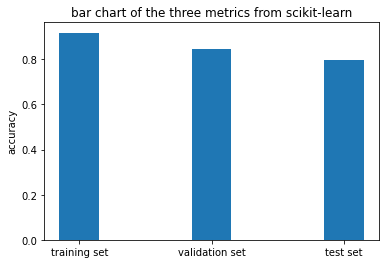

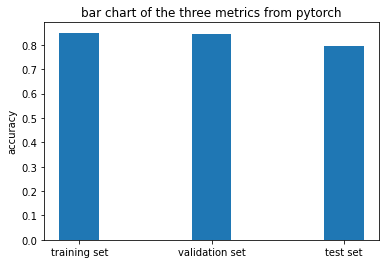

In [11]:
accuracy_kind = ['training set', 'validation set', 'test set']
values_accuracyB0 = [accuracy_train_B0, accuracy_val_B0, accuracy_test_B0]
values_accuracyB1 = [accuracy_train_B1, accuracy_val_B1, accuracy_test_B1]

bar_width = 0.3  

plt.bar(accuracy_kind, height=values_accuracyB0, width=bar_width)
plt.ylabel('accuracy') 
plt.title('bar chart of the three metrics from scikit-learn')
plt.show()

plt.bar(accuracy_kind, height=values_accuracyB1, width=bar_width)
plt.ylabel('accuracy') 
plt.title('bar chart of the three metrics from pytorch')
plt.show()

## (b) Describe at least two observations interesting to you.

1.The validation accuracy is similar to the training accuracy in pytorch model.

2.The prediction results of the two models are very similar. But the hyperparameter optimization of the pytorch model has not been completed, so I guess the final pytorch model prediction results are better than sklearn model.

# C1 Data loading and inspection

In [12]:
data_flag_C = 'octmnist'
download = True
info = INFO[data_flag_C]
task_C = info['task']
n_channels_C = info['n_channels']
n_samples_C = info['n_samples']
n_classes_C = len(info['label'])
DataClass_C = getattr(medmnist, info['python_class'])

In [13]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

BATCH_SIZE = 128
train_dataset_C = DataClass_C(split='train', transform=data_transform, download=download)
test_dataset_C = DataClass_C(split='test', transform=data_transform, download=download)
val_dataset_C = DataClass_C(split='val', transform=data_transform, download=download)

train_loader = data.DataLoader(dataset=train_dataset_C, batch_size=BATCH_SIZE, shuffle=True)
val_loader = data.DataLoader(dataset=val_dataset_C, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset_C, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /Users/benjaminxie/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/benjaminxie/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/benjaminxie/.medmnist/octmnist.npz


10 images for choroidal neovascularization class of training set:


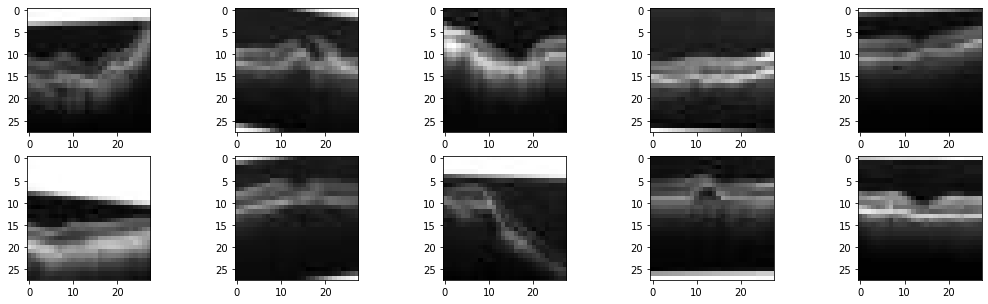

10 images for diabetic macular edema class of training set:


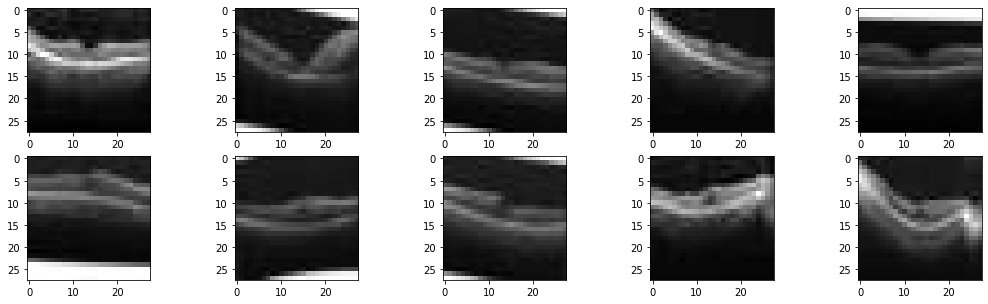

10 images for drusen class of training set:


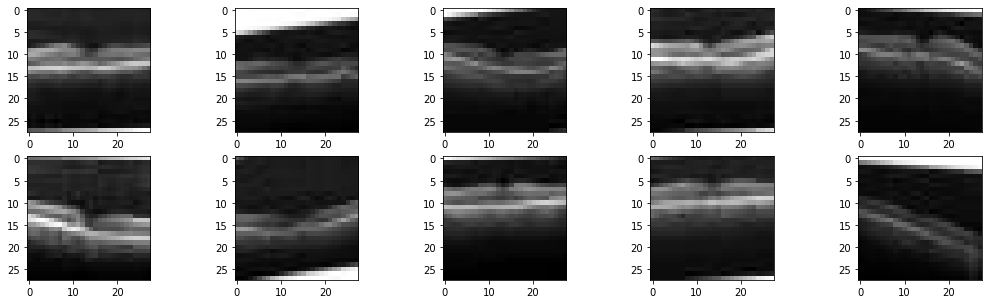

10 images for normal class of training set:


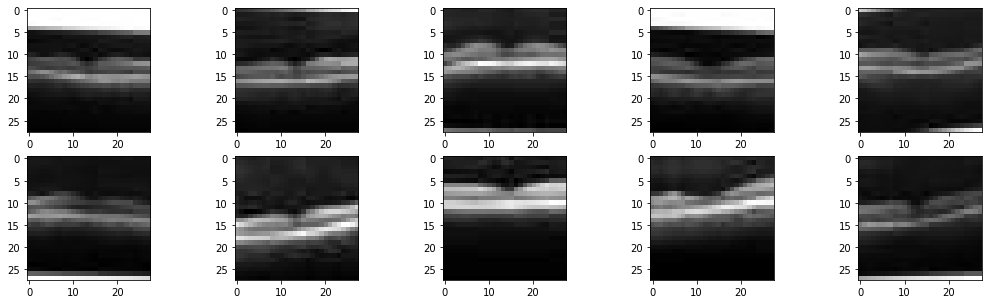

In [14]:
train0 = []
train1 = []
train2 = []
train3 = []
train0_num = 0
train1_num = 0
train2_num = 0
train3_num = 0
for i in range(n_samples_C['train']):
    if int(train_dataset_C[i][1]) == 0:
        train0.append(train_dataset_C[i][0].numpy())
        train0_num += 1
    elif int(train_dataset_C[i][1]) == 1:
        train1.append(train_dataset_C[i][0].numpy())
        train1_num += 1
    elif int(train_dataset_C[i][1]) == 2:
        train2.append(train_dataset_C[i][0].numpy())
        train2_num += 1
    else:
        train3.append(train_dataset_C[i][0].numpy())
        train3_num += 1
        
train0 = np.array(train0)
train1 = np.array(train1)
train2 = np.array(train2)
train3 = np.array(train3)

print("10 images for choroidal neovascularization class of training set:")

plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, train0_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(train0[n].squeeze(),cmap=plt.cm.gray)
plt.show()
    
print('=====================================================================================================================')
print('10 images for diabetic macular edema class of training set:')
plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, train1_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(train1[n].squeeze(),cmap=plt.cm.gray)
plt.show()

print('=====================================================================================================================')
print('10 images for drusen class of training set:')
plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, train2_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(train2[n].squeeze(),cmap=plt.cm.gray)
plt.show()

print('=====================================================================================================================')
print('10 images for normal class of training set:')
plt.figure(figsize=(18,5))
for i in range(10):
    n = random.randint(0, train3_num-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(train3[n].squeeze(),cmap=plt.cm.gray)
plt.show()

# C2 Convolutional neural networks
## (a) Design a CNN with two Conv layers and two FC layers. Train the model on the training set, use the validation set to choose the best design among at least three different choices, and test the chosen model on the test set. Report the four metrics M1 to M4.

In [15]:
class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size = 3)
        self.conv2 = nn.Conv2d(16, 16, 3)
        nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 24 * 24, 128)
        nn.ReLU()
        nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

myCNN = CNN(in_channels=n_channels_C, num_classes=n_classes_C)

In [16]:
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()
    
optimizer = optim.SGD(myCNN.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

In [17]:
import time

time_start1=time.time()
max_epochs=3
for epoch in range(max_epochs):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    myCNN.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = myCNN(inputs)
        
        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()
        
time_end1=time.time()
time1 = time_end1-time_start1

100%|██████████| 762/762 [01:05<00:00, 11.65it/s]


In [21]:
def test(split, model):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    if split == 'train':
        data_loader = train_loader 
    elif split == 'val':
        data_loader = val_loader
    else:
        data_loader = test_loader 

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1)
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)
                targets = targets.float().resize_(len(targets), 1)

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()
        
        evaluator = Evaluator(data_flag_C, split)
        metrics = evaluator.evaluate(y_score)
    
        return(metrics[1])

    
accuracy_train_C0 = test('train', myCNN)
accuracy_val_C0 = test('val', myCNN)
accuracy_test_C0 = test('test', myCNN)
print("M1) Training Accuracy: %2.3f %%" % (100 * accuracy_train_C0))
print("M2) Validation Accuracy: %2.3f %%" % (100 * accuracy_val_C0))
print("M3) Testing Accuracy: %2.3f %%" % (100 * accuracy_test_C0))
print("M4) Training Time: %3.3f s" % (time1))

M1) Training Accuracy: 41.734 %
M2) Validation Accuracy: 63.839 %
M3) Testing Accuracy: 33.900 %
M4) Training Time: 196.203 s


## (b) Design a CNN with three Conv layers and three FC layers. Train the model on the training set, use the validation set to choose the best design among at least three different choices, and test the chosen model on the test set. Report the four metrics M1 to M4.

In [22]:
class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size = 3)
        self.conv2 = nn.Conv2d(16, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        nn.BatchNorm2d(64)
        nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 22 * 22, 256)
        nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

myCNN1 = CNN(in_channels=n_channels_C, num_classes=n_classes_C)

In [23]:
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()
    
optimizer = optim.SGD(myCNN1.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

In [24]:
import time

time_start2=time.time()
max_epochs=3
for epoch in range(max_epochs):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    myCNN1.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = myCNN1(inputs)
        
        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()
        
time_end2=time.time()
time2 = time_end2-time_start2

100%|██████████| 762/762 [09:09<00:00,  1.39it/s]


In [25]:
accuracy_train_C1 = test('train', myCNN1)
accuracy_val_C1 = test('val', myCNN1)
accuracy_test_C1 = test('test', myCNN1)
print("M1) Training Accuracy: %2.3f %%" % (100 * accuracy_train_C1))
print("M2) Validation Accuracy: %2.3f %%" % (100 * accuracy_val_C1))
print("M3) Testing Accuracy: %2.3f %%" % (100 * accuracy_test_C1))
print("M4) Training Time: %4.3f s" % (time2))

M1) Training Accuracy: 42.355 %
M2) Validation Accuracy: 64.069 %
M3) Testing Accuracy: 34.000 %
M4) Training Time: 1638.249 s


# C3 Performance comparison
## (a) Summarise each of the four metrics from the two chosen models in C2 using one or more bar graphs.

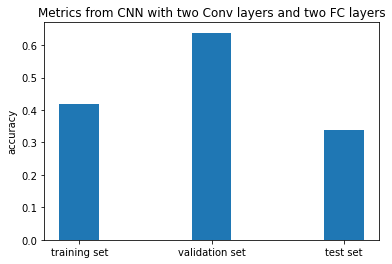

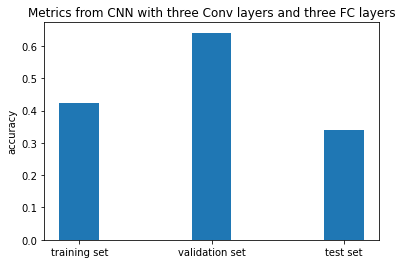

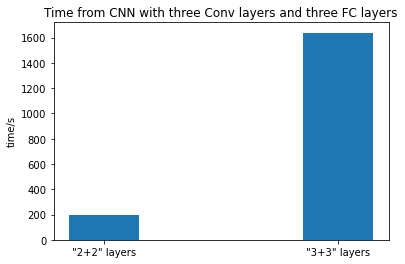

In [26]:
accuracy_kind = ['training set', 'validation set', 'test set']
X_time = ['"2+2" layers', '"3+3" layers']

values_accuracyC0 = [accuracy_train_C0, accuracy_val_C0, accuracy_test_C0]
values_accuracyC1 = [accuracy_train_C1, accuracy_val_C1, accuracy_test_C1]
values_time = [time1, time2]

bar_width = 0.3  

plt.bar(accuracy_kind, height=values_accuracyC0, width=bar_width)
plt.ylabel('accuracy') 
plt.title('Metrics from CNN with two Conv layers and two FC layers')
plt.show()

plt.bar(accuracy_kind, height=values_accuracyC1, width=bar_width)
plt.ylabel('accuracy') 
plt.title('Metrics from CNN with three Conv layers and three FC layers')
plt.show()

plt.bar(X_time, height=values_time, width=bar_width)
plt.ylabel('time/s') 
plt.title('Time from CNN with three Conv layers and three FC layers')
plt.show()

(b) Describe at least two observations interesting to you.

1.Only adding the number of convolutional layers and fully connected layers without tuning and optimization cannot improve the prediction accuracy.

2.Three convolutional layers and three fully connected layers model training process takes about 20 times longer than the two convolutional layers and two fully connected layers model.

# D1 Dimensionality reduction and clustering
## (a) Apply PCA to all images of these two chosen classes. Visualise the top 5 eigenvectors as images and display them in the order of descending corresponding values (the one corresponding to the largest eigenvalue first).

In [2]:
from torchvision import datasets, transforms
from sklearn.decomposition import PCA

torch.manual_seed(62900) 

In [49]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

test_dataset_D = datasets.FashionMNIST(root='/Volumes/BENJAMIN K/master/COM6509-COM4509/assignment2/MedMNIST-main', train=False, download=True, transform=data_transform)

In [55]:
imgs = []
labels = []
for i in range(len(test_dataset_D)):
    img, label = test_dataset_D[i]
    if label == 7 or label == 9:
        imgs.append(np.array(img.flatten()))
        labels.append(label)
    

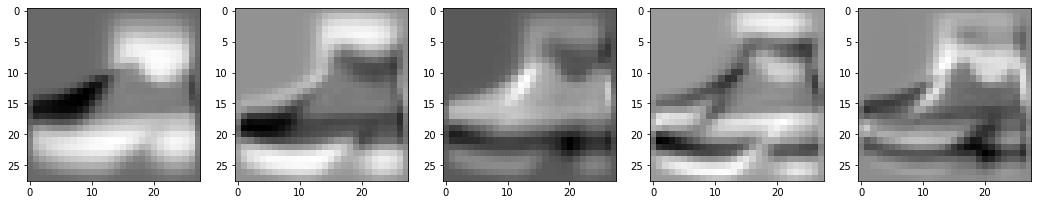

In [57]:
pca1 = PCA(n_components=0.95)
pca1_imgs = pca1.fit_transform(imgs)

i = 0
plt.figure(figsize=(18, 5))
for eigenvector in pca1.components_[: 5]:
    plt.subplot(1, 5, i+1)
    plt.imshow(eigenvector.reshape(28, 28),cmap='gray')
    i += 1
plt.show()

## (b) Use the top 30 PCs to reconstruct 10 images, with 5 from each class (any 5 images are fine from each class). Show these 10 pairs of reconstructed and original images.

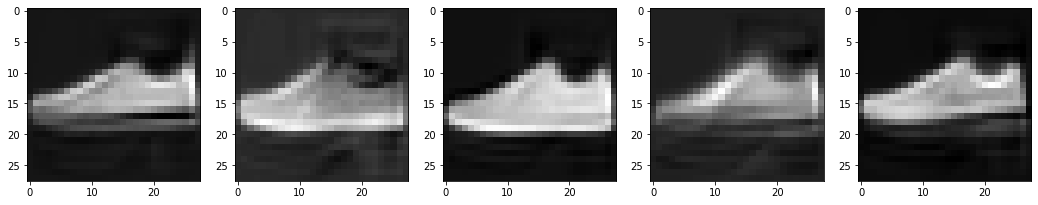

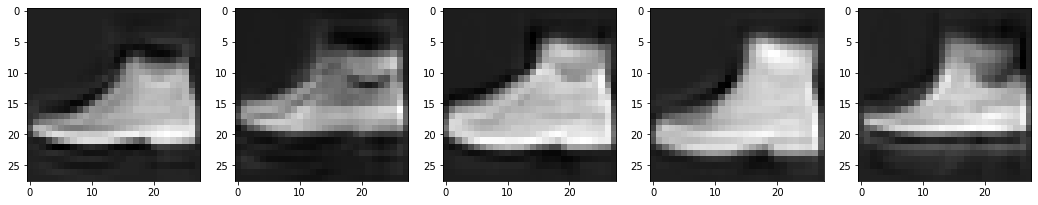

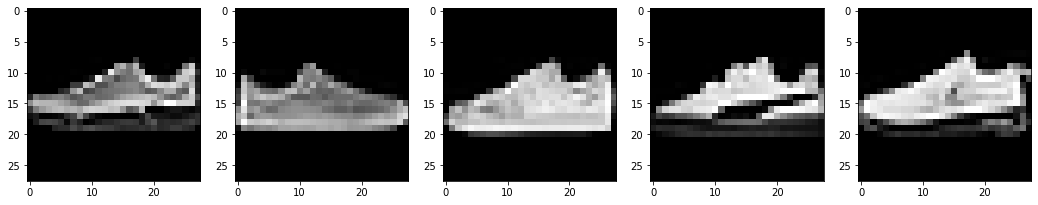

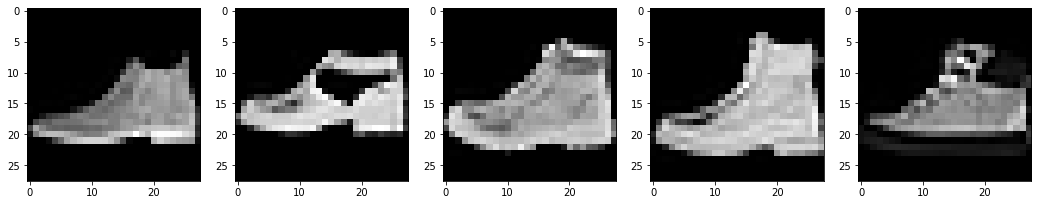

In [62]:
pca2 = PCA(n_components=30)
# test_Both_2 = pca2.fit_transform(test_Both)
# test_Sneaker_2 = pca2.transform(test_Sneaker)
# test_Ankleboot_2 = pca2.transform(test_Ankleboot)

pca2_imgs = pca2.fit_transform(imgs)

inv2_imgs = pca2.inverse_transform(pca2_imgs)

cnt = 0

plt.figure(figsize=(18,5))
for i in range(20):
    if labels[i] == 7:
        plt.subplot(1, 5, cnt+1)
        plt.imshow(inv2_imgs[i].reshape(28,28),cmap='gray')
        cnt += 1
    if cnt == 5:
        cnt = 0
        break
plt.show()

plt.figure(figsize=(18,5))
for i in range(20):
    if labels[i] == 9:
        plt.subplot(1, 5, cnt+1)
        plt.imshow(inv2_imgs[i].reshape(28,28),cmap='gray')
        cnt += 1
    if cnt == 5:
        cnt = 0
        break
plt.show()

plt.figure(figsize=(18,5))
for i in range(20):
    if labels[i] == 7:
        plt.subplot(1, 5, cnt+1)
        plt.imshow(imgs[i].reshape(28,28),cmap='gray')
        cnt += 1
    if cnt == 5:
        cnt = 0
        break
plt.show()

plt.figure(figsize=(18,5))
for i in range(20):
    if labels[i] == 9:
        plt.subplot(1, 5, cnt+1)
        plt.imshow(imgs[i].reshape(28,28),cmap='gray')
        cnt += 1
    if cnt == 5:
        cnt = 0
        break
plt.show()


## (c) Visualise the two-dimensional PCA representations of all data points in a 2D plane (i.e. using the top two PCs). Use different colours/markers for the two classes for better visualisation (Hint: You need to use the class labels here for visualisation).

/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


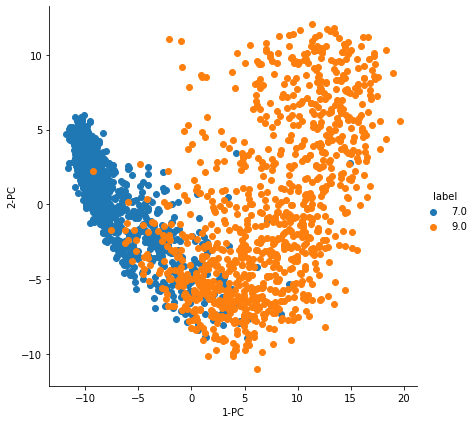

In [48]:
import pandas as pd
import seaborn as sn
pca3 = PCA(n_components=2)
imgs_pca = pca3.fit_transform(imgs)
data_pca = np.vstack((imgs_pca.T, labels)).T

pca_df = pd.DataFrame(data = data_pca, columns=('1-PC', '2-PC', 'label'))
sn.FacetGrid(pca_df, hue='label', size=6).map(plt.scatter, '1-PC', '2-PC').add_legend()
plt.show()

## (d) Use spectral clustering to cluster all data points as represented by the top two PCs (clustering of two-dimensional vectors, where each vector has two values, PC1 and PC2). Visualise the two clusters with different colours/markers in 2D.

/Users/benjaminxie/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


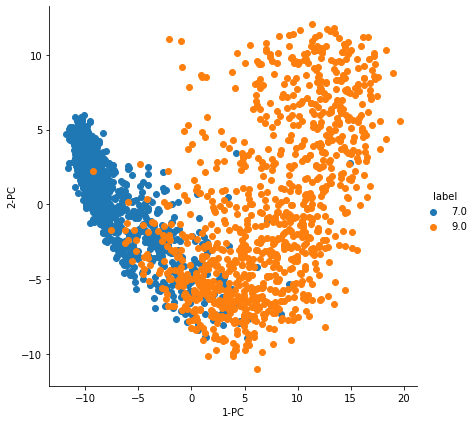

In [186]:
from sklearn.cluster import KMeans

imgs1 = []
imgs2 = []
for i in range(len(imgs)):
    if labels[i] == 7:
        imgs1.append(imgs[i].flatten())
    else:
        imgs2.append(imgs[i].flatten())
        
imgs1_pca=pca3.transform(imgs1)
imgs2_pca=pca3.transform(imgs2)

kmeans = KMeans(n_clusters=2, random_state=0) 
imgs_pred = kmeans.fit_predict(imgs_pca)

data1_pca = np.vstack((imgs_pca.T, imgs_pred)).T

pca_df = pd.DataFrame(data = data_pca, columns=('1-PC', '2-PC', 'label'))
sn.FacetGrid(pca_df, hue='label', size=6).map(plt.scatter, '1-PC', '2-PC').add_legend()
plt.show()

## (e) Design a new autoencoder with five Conv2d layers and five ConvTranspose2d layers. You are free to choose the activation functions and settings such as stride and padding. Train this new autoencoder on all images of these two chosen classes for at least 20 epochs. Plot the loss against the epoch.

In [139]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 2, 3),
            nn.ReLU(),
            nn.Conv2d(2, 4, 3),
            nn.ReLU(),
            nn.Conv2d(4, 8, 3),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3),
            nn.ReLU(),
            nn.Conv2d(16, 32, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 4, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(4, 2, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(2, 1, 3),
            nn.Sigmoid() 
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [154]:
myAE=Autoencoder()

test_dataset_D1 = []
for i in range(len(test_dataset_D)):
    if test_dataset_D[i][1] == 7 or test_dataset_D[i][1] == 9:
        test_dataset_D1.append(test_dataset_D[i])
    
batch_size=64
learning_rate=1e-3
max_epochs = 20

criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
train_loader = torch.utils.data.DataLoader(test_dataset_D1, batch_size=batch_size, shuffle=True)
outputs = []

for epoch in range(max_epochs):
    for data in train_loader:
        img, label = data
        optimizer.zero_grad()
        recon = myAE(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()        
    if (epoch % 2) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append(float(loss))

Epoch:1, Loss:1.5654
Epoch:3, Loss:1.5733
Epoch:5, Loss:1.5877
Epoch:7, Loss:1.5099
Epoch:9, Loss:1.4983
Epoch:11, Loss:1.5208
Epoch:13, Loss:1.4360
Epoch:15, Loss:1.4452
Epoch:17, Loss:1.5039
Epoch:19, Loss:1.2825


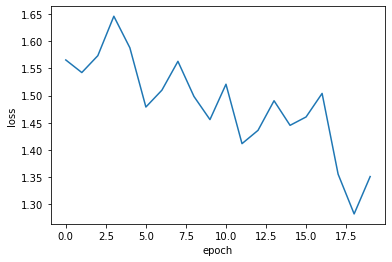

In [163]:
X = []
for i in range(20):
    X.append(i)

plt.plot(X,outputs)
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.show()

# D2 Observation
## Describe at least two observations interesting to you from D1 above.
1.When performing principal component analysis, the more the number of principal components is selected, the clearer the trained picture will be.
2.Reconstructing the images in PCA can even change the original images' placement angle.